###__Dane do analizy__:  MNIST.csv (Modified National Institute of Standards and Technology database)

###__Cel badania__:  Analiza algorytmu selekcji cech PCA . Wizualizacja danych  za pomocą PCA i t-SNE

###__Klasyfikator__:   Decision tree, kNN, Logistic Regression  +PCA

####__Zadanie 1__: Ładowanie zbioru treningowego, testowego, wstępna analiza  i dodawanie nazw dla kolumn
* Dodać nazwy kolumn: <span style='color:red'>  class, pixel1, pixel2,...pixel 784 </span>
* Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
* Wyznaczyć rozkład kategorii (w procentach).
* Narysować wykres słupkowy rozkładu kategorii.

#####__Zadanie 2__:  Analiza głównych składowych <i>PCA</i>

__Wskazówka__: <span style='color:red'>  from sklearn.decomposition import PCA </span>
##### __Zadanie 2.1__:  Zmienić parametru algorytmu, żeby otrzymać procent wyjaśnionej wariancji wynosi 0.90. Ile wynosi liczba wymiarów?
__Wskazówka: Zmienić parametry__
* Ustawić pca.explained_variance_ratio_
#####__Zadanie 2.2__ :Ile wynosi stopień wyjaśnionej wariancji, jeśli liczna wymiarów należy do przedziału od  [10, 150]?.

####__Zadanie 3__ : Wyznaczyć liczbę wymiarów PCA, żeby stopień wyjaśnionej wariancji = 0.9. Wykonać redukcję danych. Przekształcić dane treningowe i testowe na nową przestrzenią.


####__Zadanie 4__ : Wizualizować  dane oryginalne i dane skompresowane.

##### __Zadanie__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas
__Wskazówka__: <span style='color:red'>   from sklearn.tree import DecisionTreeClassifier </span>

####__Zadanie 6__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych skompresowanych.  Wyświetlić czas.

####__Zadanie 7__: Trenować klasyfikator  <i> Logistic Regression </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas i skuteczność modelu.
__Wskazówka__: <span style='color:red'>  from sklearn.linear_model import LogisticRegression  </span>

####__Zadanie 8__: Trenować klasyfikator  <i>k-NN </i>  z optymalizacją parametrów na danych oryginalnych i zredukowanych.  Wyświetlić czas i skuteczność modelu.

####__Zadanie 9__: Wizualizować dane na dwóch wymiarach wyznaczonych przez t-NSE i PCA (liczba wymiarów =2).

####__Zadanie 10__: Napisać podsumowanie

1. Jaki procent wyjaśnialności wariancji trzeba wybrać, żeby jakość klasyfikatora na danych skompresowanych jest przybliżona do modelu budowanego na danych oryginalnych?
klasyfikator jest najlepszy i z jakimi parametrami?
2. Wśród algorytmów DT, KNN i Logistic Regression, który model zyskuje najwięcej czasu na danych zredukowanych?
3. Która wizualizacja jest lepsza, za pomocą t-SNE (*t-distributed Stochastic Neighbor Embedding*), czy PCA?


s

# Lab 6-7 MNIST Dimension Reduction with PCA
## Zad 1
### Ładowanie danych

In [1]:
import pandas as pd
import numpy as np
from pyparsing import original_text_for

path = "./"
df_train = pd.read_csv(path+"mnist_train.csv")
df_test = pd.read_csv(path+"mnist_test.csv")

### Zmiana nazw kolumn

In [2]:
column_names = ['class'] + ['pixel{}'.format(i) for i in range(1, 785)]
df_train.columns = column_names
df_test.columns = column_names

### Rozkład klas w %

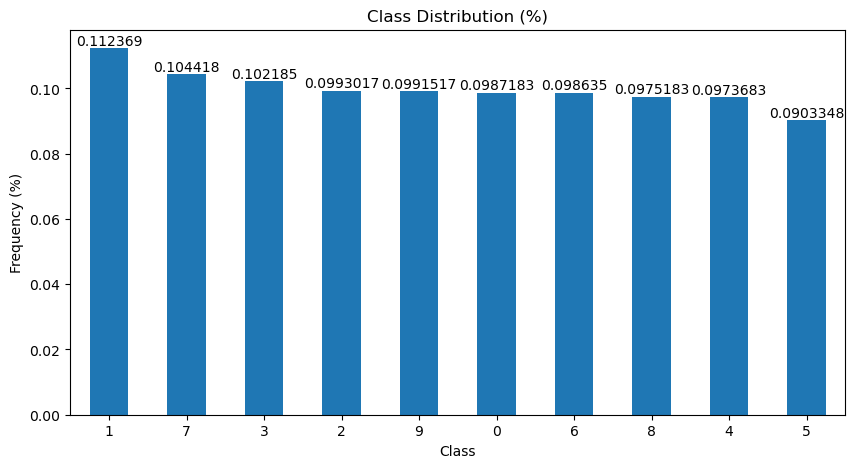

In [3]:
import matplotlib.pyplot as plt

categories = df_train['class'].value_counts().apply(lambda x: x/np.sum(df_train['class'].value_counts()))
# categories = categories.sort_index()

plt.figure(figsize=(10, 5))
categories.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency (%)')
plt.title('Class Distribution (%)')
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

In [4]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(59999, 784)
(9999, 784)


## Zad 2
### Analiza głównych składowych PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
results = {i + 1: val for i, val in enumerate(cumulative_variance)}
results


{1: 0.09704809518584652,
 2: 0.16800797661691977,
 3: 0.2296998315256797,
 4: 0.28359337291786696,
 5: 0.33228210524064433,
 6: 0.3754048339127058,
 7: 0.408124382005727,
 8: 0.4369636660093416,
 9: 0.46458375233196647,
 10: 0.4881539372584555,
 11: 0.5092459757620873,
 12: 0.5294758912913663,
 13: 0.5466342812668878,
 14: 0.5635529337369057,
 15: 0.579339360726283,
 16: 0.5941691199735714,
 17: 0.6074144084870381,
 18: 0.6201831180538588,
 19: 0.6320555594630084,
 20: 0.6435824430748652,
 21: 0.6542442691324877,
 22: 0.6643115410580176,
 23: 0.6738471952329189,
 24: 0.682972471808291,
 25: 0.6918066472923526,
 26: 0.7001999218363443,
 27: 0.7083253767014328,
 28: 0.7161890203281606,
 29: 0.7236363918447136,
 30: 0.7305450177567501,
 31: 0.7371260123480009,
 32: 0.7436075871697024,
 33: 0.7496337761600286,
 34: 0.7554996555515983,
 35: 0.7611998471901489,
 36: 0.7666360145981982,
 37: 0.7716939376847258,
 38: 0.7765724068000378,
 39: 0.7813866556483251,
 40: 0.7861087633520293,
 41: 0.

### 2.1 Dostosowanie parametrów PCA by uzyskać explained_variance = 0.9

In [6]:
def get_n_comp(threshold):
    return np.argmax(cumulative_variance >= threshold) + 1

In [7]:
threshold = 0.9
n_components_90 = get_n_comp(threshold)
n_components_90

87

### 2.2 Ile wynosi stopień explained_variance_ratio dla n_components [10, 150]?

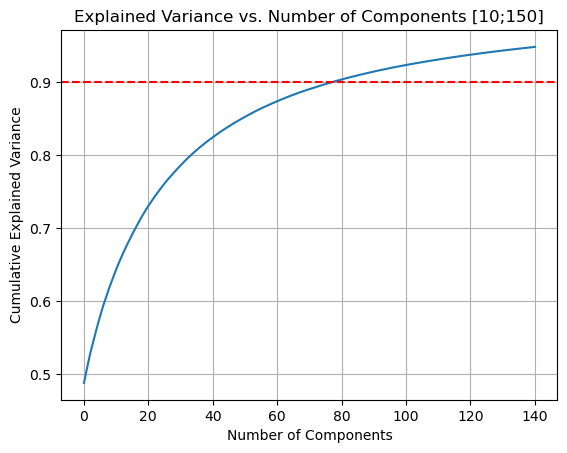

In [8]:
start_val, end_val = 10, 150
selected_cumulative_variance = cumulative_variance[start_val - 1:end_val]
plt.plot(selected_cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components [10;150]')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.grid(True)
plt.show()

## Zad 3
### Wykonać redukcję danych. Przekształcić dane treningowe i testowe na nową przestrzeń.

In [9]:
def reduce_dataset(pca_n_comp):
    pca = PCA(n_components = pca_n_comp)
    X_train_reduced_np = pca.fit_transform(X_train)
    X_train_recovered_np = pca.inverse_transform(X_train_reduced_np)
    X_train_reduced = pd.DataFrame(X_train_reduced_np)
    X_train_recovered = pd.DataFrame(X_train_recovered_np)

    X_test_reduced_np = pca.transform(X_test)
    X_test_reduced = pd.DataFrame(X_test_reduced_np)

    return X_train_reduced, X_test_reduced, X_train_recovered
X_train_reduced, X_test_reduced, X_train_recovered = reduce_dataset(n_components_90)

## Zad 4
### Wizualizacja danych oryginalnych i zredukowanych

In [10]:
def visualize_dataset(dataset):
    plt.figure(figsize=(10,4))
    for i in range(8):
        plt.subplot(240+1+i)
        ith_image = dataset.iloc[i,:]
        ith_image_arr = ith_image.to_numpy()
        ith_image= ith_image_arr.reshape(28,28)
        plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
    plt.show()

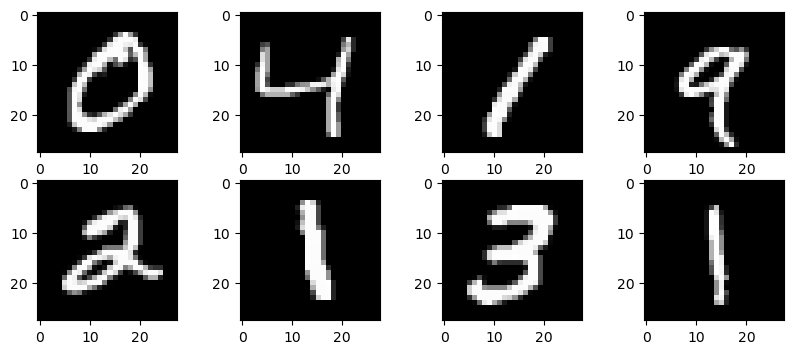

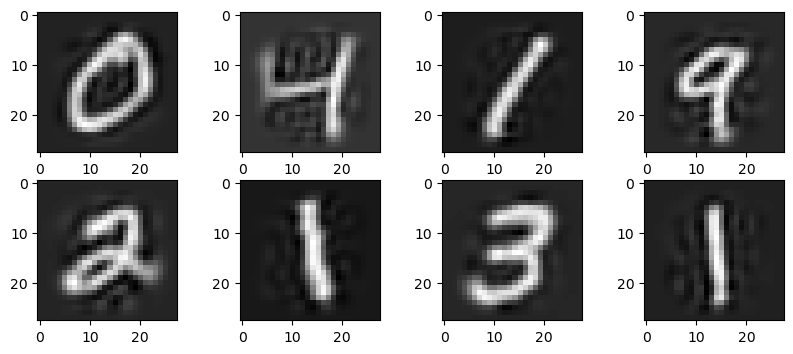

In [11]:
visualize_dataset(X_train)
print("\n")
visualize_dataset(X_train_recovered)

## Zad 5, 6, 7, 8

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score

models = {
    "DecTree": DecisionTreeClassifier(random_state=42),
    f"DecTree (red)[{threshold}]": DecisionTreeClassifier(random_state=42),
    "LogReg": LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42),
    f"LogReg (red)[{threshold}]": LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    f"KNN (red)[{threshold}]": KNeighborsClassifier(n_neighbors=10)
}
times = {x:.0 for x in models.keys()}
accuracies = {x:.0 for x in models.keys()}
datasets = {
    "original":
        {
            "X_train": X_train,
            "X_test": X_test,
        },
    f"reduced [{threshold}]":
        {
            "X_train": X_train_reduced,
            "X_test": X_test_reduced,
        }
}
def train_time_eval(model_name, dataset_kind, prnt=True):
    if dataset_kind not in datasets.keys():
        print("Invalid dataset kind")
        return

    X_train = datasets[dataset_kind]["X_train"]
    X_test = datasets[dataset_kind]["X_test"]
    model = models[model_name]

    time_start = time.time()
    model.fit(X_train, y_train)
    time_delta =  time.time()-time_start
    times[model_name] = time_delta
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    if prnt:
        print(f"{model_name}: accuracy={accuracy}; time={time_delta}")

### Decision Tree (original)

In [13]:
# train_time_eval("DecTree", "original")

### Decision Tree (reduced) [0.9]

In [14]:
# train_time_eval(f"DecTree (red)[{threshold}]", f"reduced [{threshold}]")

In [15]:
import warnings
warnings.filterwarnings("ignore")
for model_name, model in models.items():
    if "(red)" in model_name:
        dataset_kind = f"reduced [{threshold}]"
    else:
        dataset_kind = "original"
    train_time_eval(model_name, dataset_kind)

DecTree: accuracy=0.8777877787778778; time=12.403288841247559
DecTree (red)[0.9]: accuracy=0.83998399839984; time=14.61018967628479
LogReg: accuracy=0.9232923292329233; time=7.628605842590332
LogReg (red)[0.9]: accuracy=0.914991499149915; time=1.828125
KNN: accuracy=0.9664966496649665; time=0.09611821174621582
KNN (red)[0.9]: accuracy=0.9716971697169717; time=0.008134126663208008


In [16]:
original_models = [x for x in models.keys() if "(red)" not in x]
reduced_models = list(models.keys()-original_models)
mapping = {x:y for x in original_models for y in reduced_models if ((x in y) and (str(threshold) in y))}
time_gains = {x: times[x]-times[y] for x, y in mapping.items()}

def plot_results(metric_name):
    if metric_name.lower() == "time":
        data = times
    elif metric_name.lower() == "accuracy":
        data = accuracies
    elif metric_name.lower() == "time gain":
        data = time_gains
    else:
        print("invalid metric name")
        return
    model_names = list(data.keys())
    metric_values = list(data.values())

    sorted_data = sorted(zip(model_names, metric_values), key=lambda item: item[1], reverse=True)
    sorted_model_names, sorted_metric_values = zip(*sorted_data)

    x_pos = np.arange(len(sorted_model_names))

    plt.figure(figsize=(12, 6))
    bars = plt.bar(x_pos, sorted_metric_values)

    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} of models (original vs reduced [{threshold}])")
    plt.xticks(x_pos, sorted_model_names, rotation=45, ha='right')

    for bar, score in zip(bars, sorted_metric_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

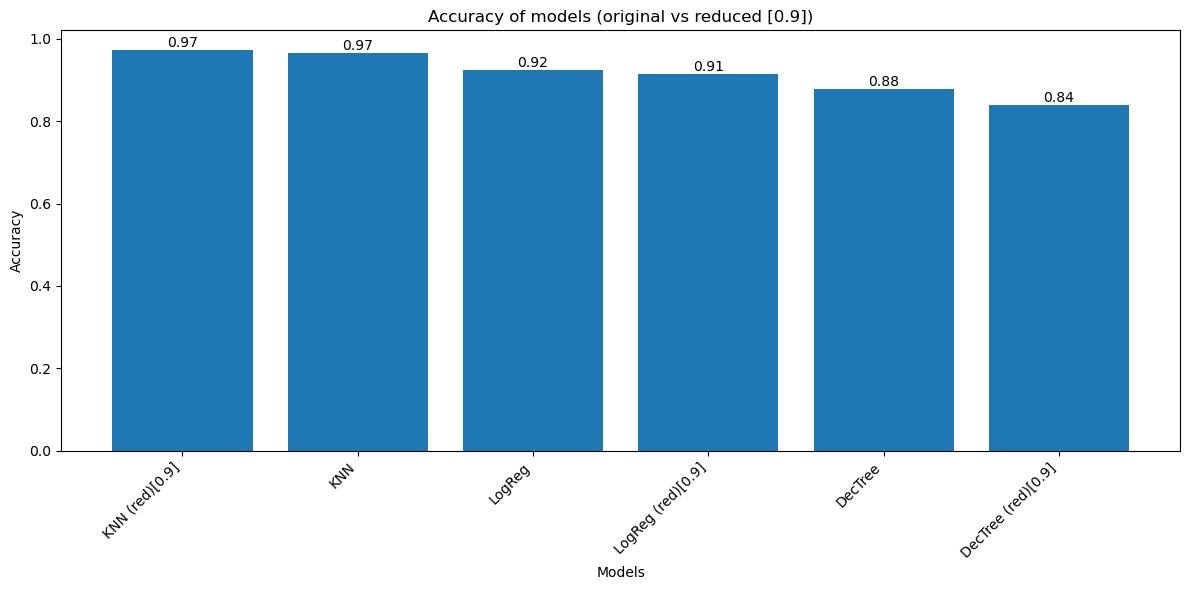

In [17]:
plot_results("Accuracy")

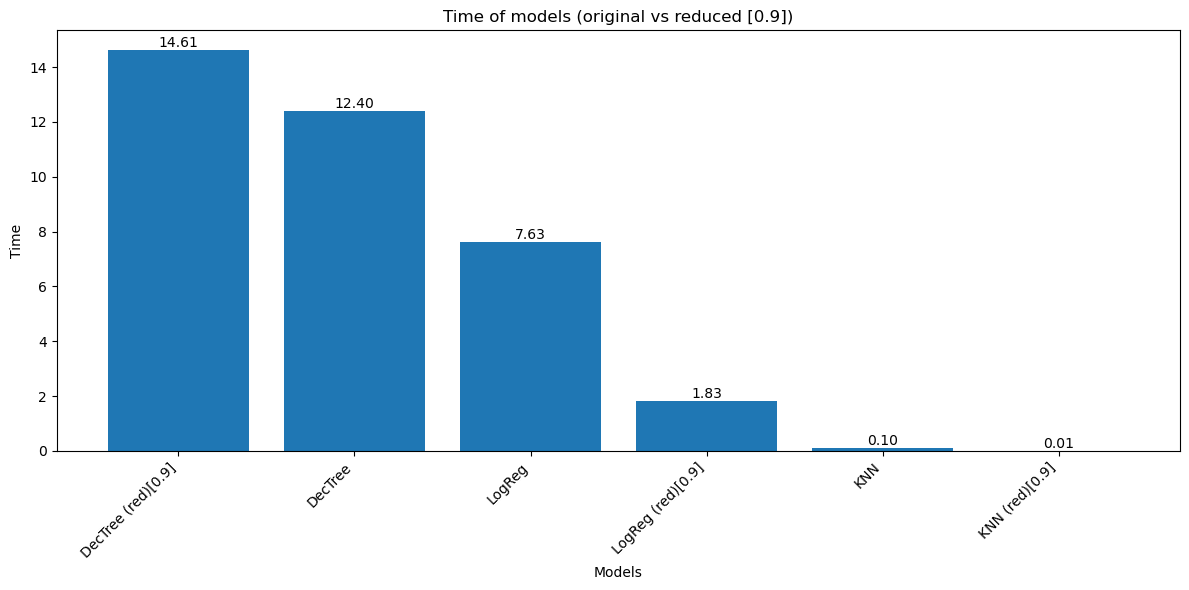

In [18]:
plot_results("Time")

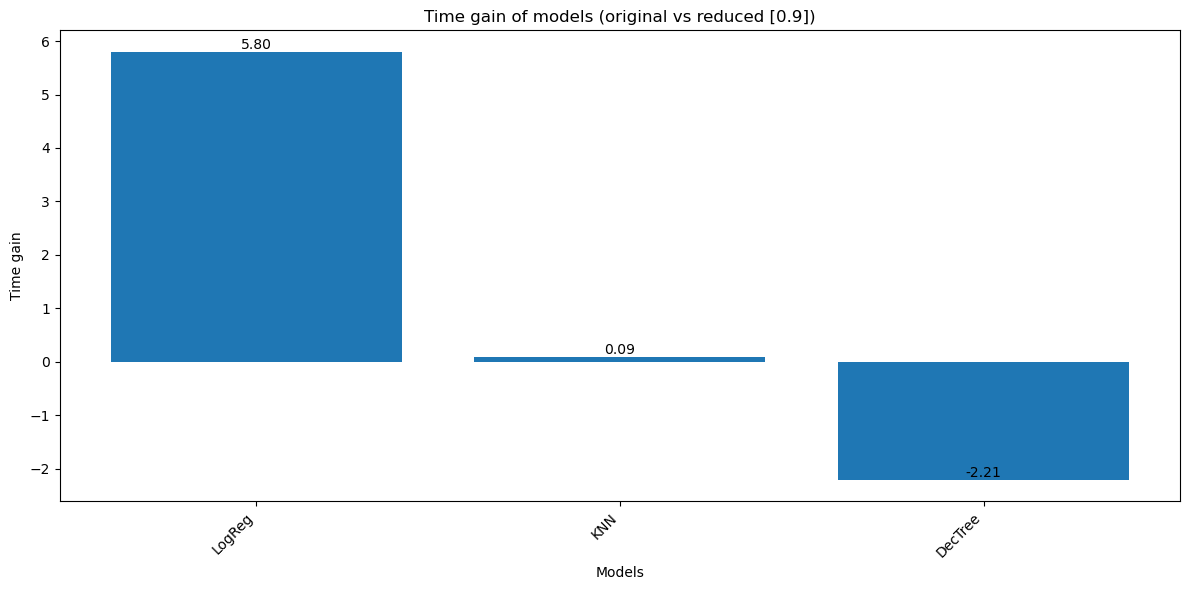

In [19]:
plot_results("Time gain")

## Changing threshold to 0.95

In [20]:
threshold = 0.95
n_comp_95 = get_n_comp(threshold)

In [21]:
X_train_reduced_95, X_test_reduced_95, _ = reduce_dataset(n_comp_95)
print(X_train_reduced_95.shape, X_test_reduced_95.shape)

(59999, 154) (9999, 154)


In [22]:
models[f"DecTree (red)[{threshold}]"]= DecisionTreeClassifier(random_state=42)
models[f"LogReg (red)[{threshold}]"]= LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
models[f"KNN (red)[{threshold}]"]= KNeighborsClassifier(n_neighbors=10)

datasets[f"reduced [{threshold}]"] = {
    "X_train": X_train_reduced_95,
    "X_test": X_test_reduced_95
}

In [23]:
train_time_eval(f"DecTree (red)[{threshold}]", f"reduced [{threshold}]")

DecTree (red)[0.95]: accuracy=0.8352835283528353; time=28.70133686065674


In [24]:
train_time_eval(f"LogReg (red)[{threshold}]", f"reduced [{threshold}]")

LogReg (red)[0.95]: accuracy=0.9198919891989199; time=2.747319221496582


In [25]:
train_time_eval(f"KNN (red)[{threshold}]", f"reduced [{threshold}]")

KNN (red)[0.95]: accuracy=0.9683968396839684; time=0.021022558212280273


### Accuracy

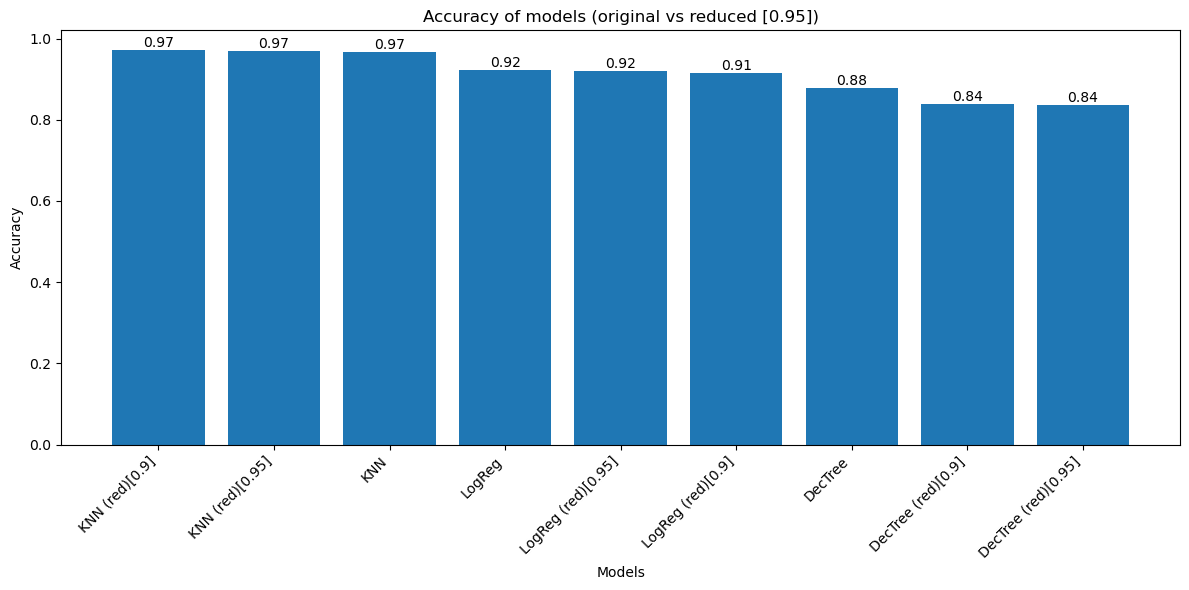

In [26]:
plot_results("Accuracy")

### Time gain

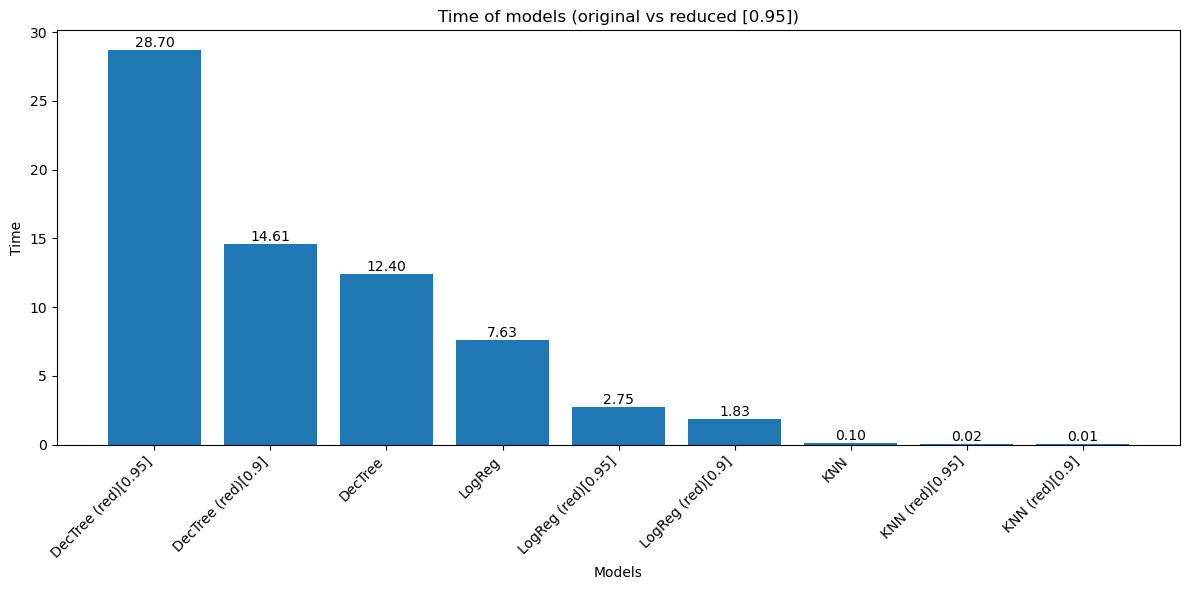

In [27]:
plot_results("Time")

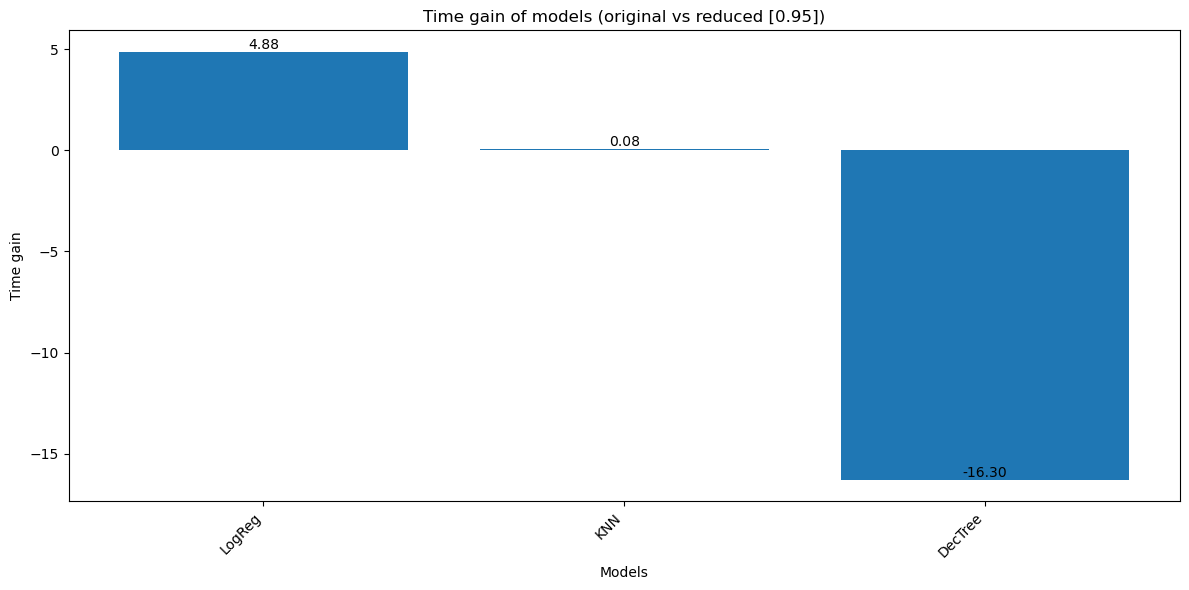

In [28]:
original_models = [x for x in models.keys() if "(red)" not in x]
reduced_models = list(models.keys()-original_models)
mapping = {x:y for x in original_models for y in reduced_models if ((x in y) and (str(threshold) in y))}
time_gains = {x: times[x]-times[y] for x, y in mapping.items()}

plot_results("Time gain")

## Changing threshold do 0.8

In [29]:
threshold = 0.8
n_comp_80 = get_n_comp(threshold)
X_train_reduced_80, X_test_reduced_80, _=reduce_dataset(n_comp_80)
print(X_train_reduced_80.shape, X_test_reduced_80.shape)

(59999, 44) (9999, 44)


In [30]:
models[f"DecTree (red)[{threshold}]"]= DecisionTreeClassifier(random_state=42)
models[f"LogReg (red)[{threshold}]"]= LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
models[f"KNN (red)[{threshold}]"]= KNeighborsClassifier(n_neighbors=10)

datasets[f"reduced [{threshold}]"] = {
    "X_train": X_train_reduced_80,
    "X_test": X_test_reduced_80
}

In [31]:
train_time_eval(f"DecTree (red)[{threshold}]", f"reduced [{threshold}]")

DecTree (red)[0.8]: accuracy=0.8446844684468446; time=7.3389246463775635


In [32]:
train_time_eval(f"LogReg (red)[{threshold}]", f"reduced [{threshold}]")

LogReg (red)[0.8]: accuracy=0.9111911191119112; time=1.5520570278167725


In [33]:
train_time_eval(f"KNN (red)[{threshold}]", f"reduced [{threshold}]")

KNN (red)[0.8]: accuracy=0.9731973197319732; time=0.007508993148803711


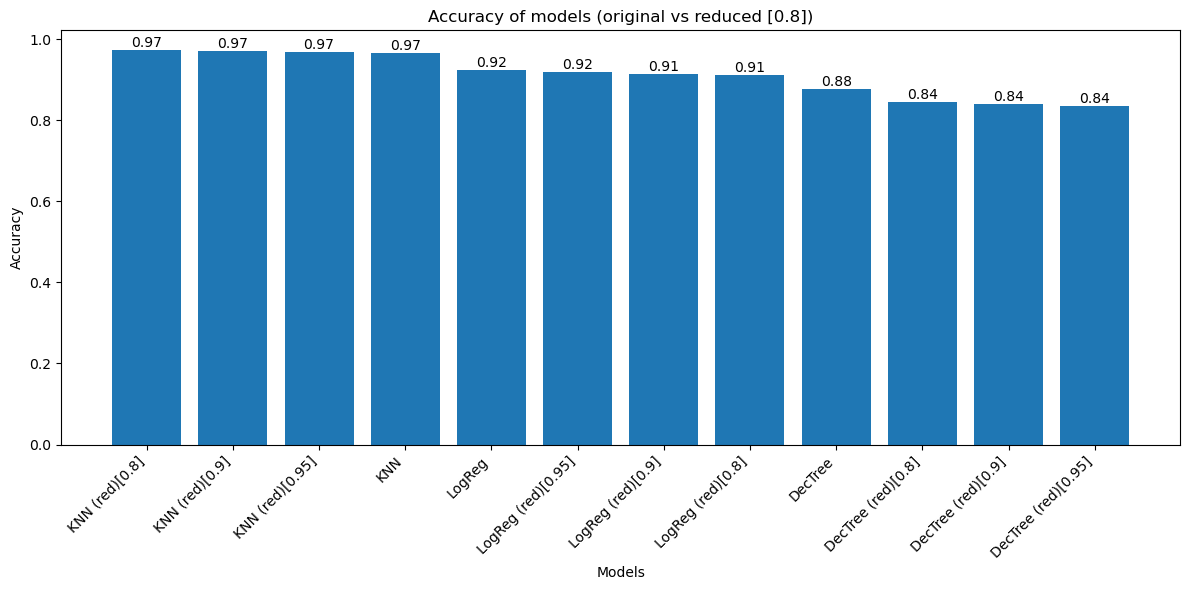

In [34]:
plot_results("Accuracy")

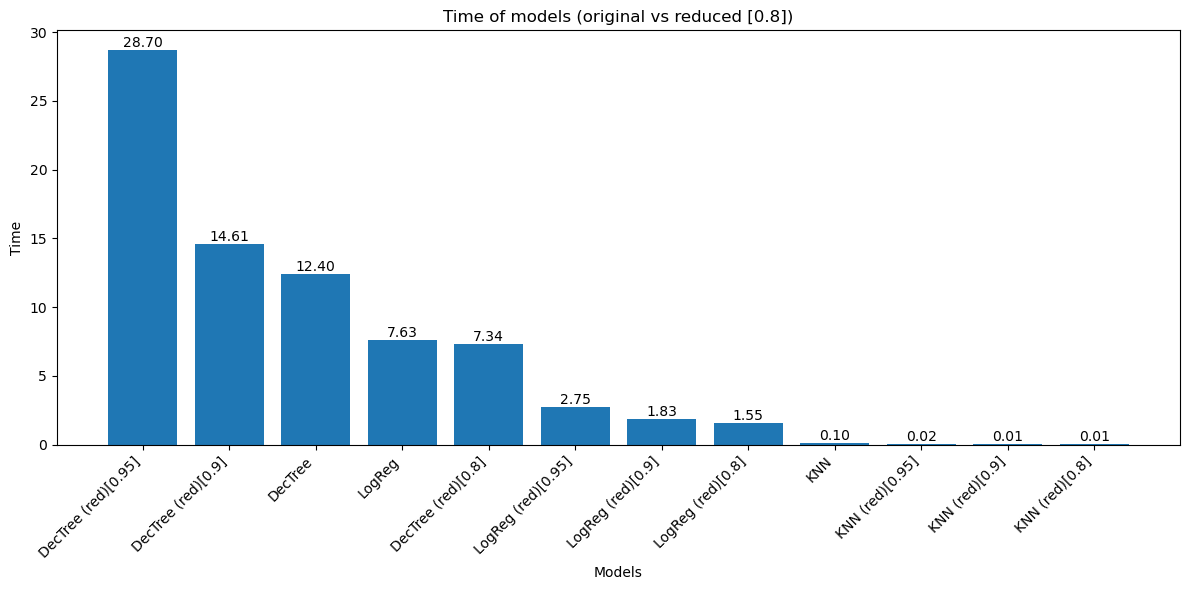

In [35]:
plot_results("Time")

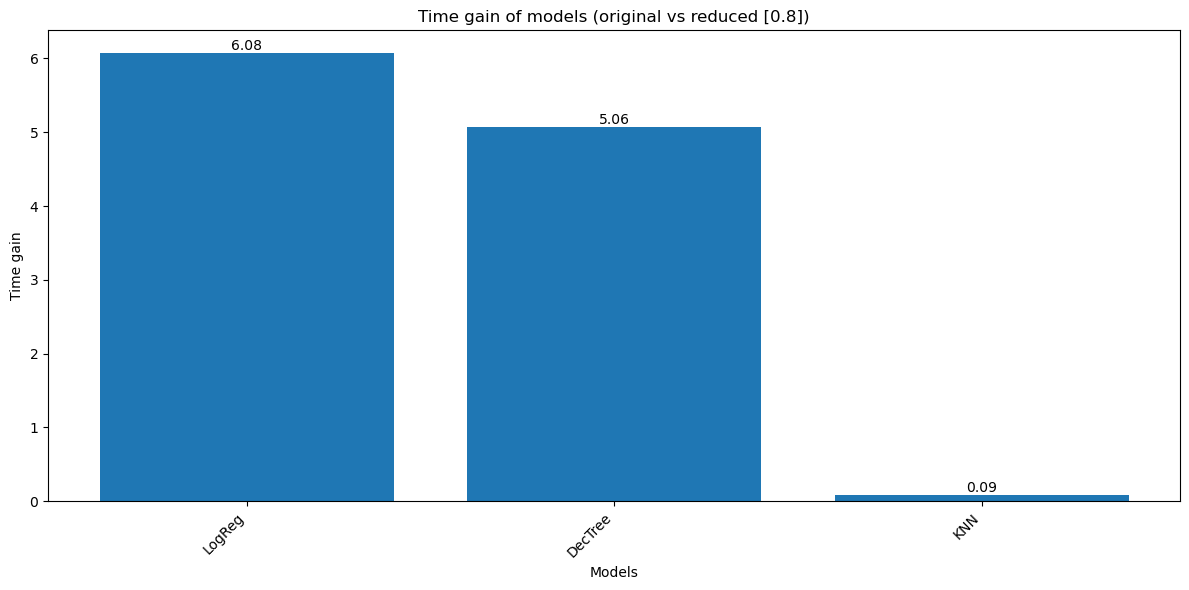

In [36]:
original_models = [x for x in models.keys() if "(red)" not in x]
reduced_models = list(models.keys()-original_models)
mapping = {x:y for x in original_models for y in reduced_models if ((x in y) and (str(threshold) in y))}
time_gains = {x: times[x]-times[y] for x, y in mapping.items()}

plot_results("Time gain")

## Zad 9
### Wizualizacja za pomocą t_SNE
Ze względu na długo czas obliczenia do wizualicji wylosować 6000 rekordów

In [37]:
np.random.seed(42)

m = 6000
idx = np.random.permutation(60000-1)[:m]

X = X_train.to_numpy()[idx]
y = y_train.to_numpy()[idx]

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

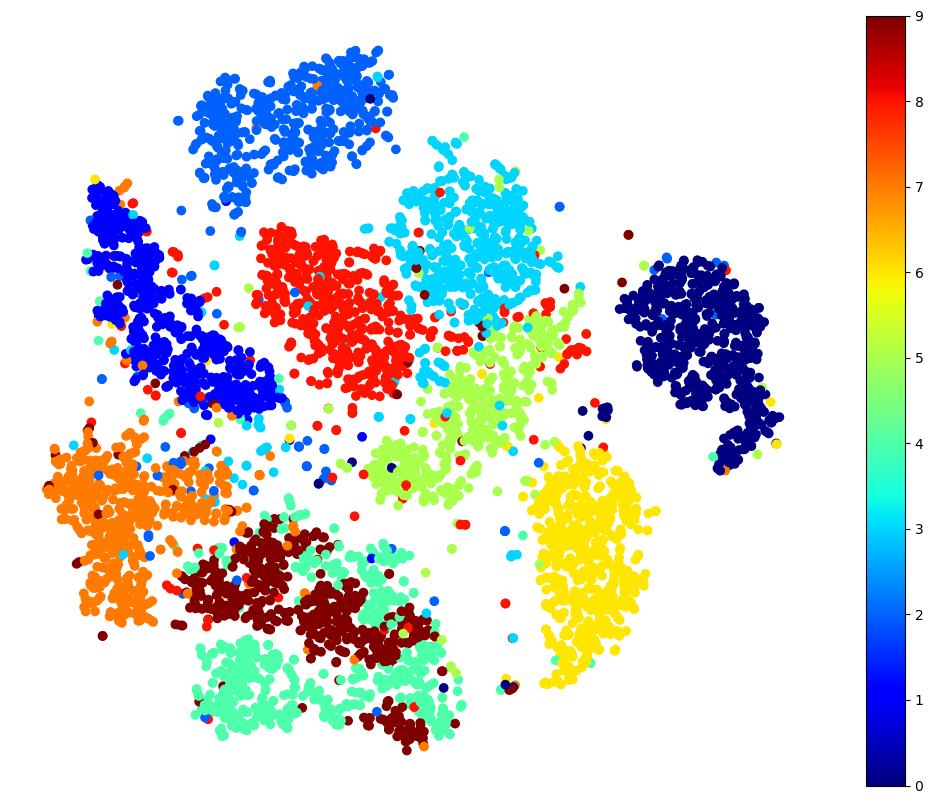

In [39]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

### Wizualizacja za pomocą PCA

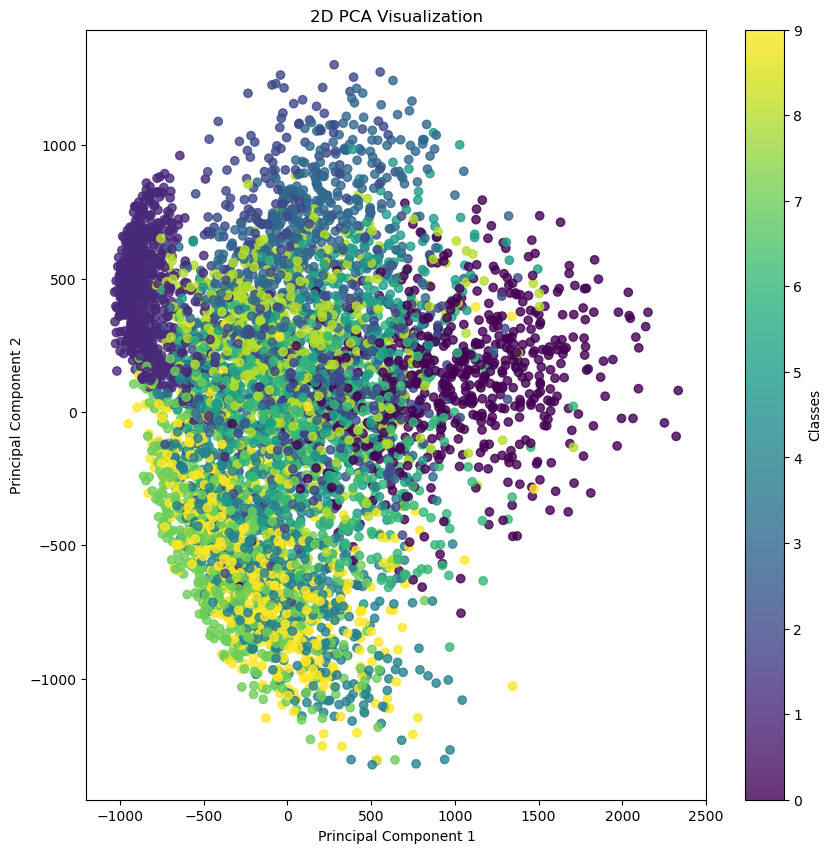

In [40]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Classes')  # Add legend for classes
plt.title('2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Zad 10

1. Jaki procent wyjaśnialności wariancji trzeba wybrać, żeby jakość klasyfikatora na danych skompresowanych jest przybliżona do modelu budowanego na danych oryginalnych?
klasyfikator jest najlepszy i z jakimi parametrami?
    - Wartości z przedziału 0.8-0.95 sprawdzają się dobrze. Najlepszy okazał się KNN.
2. Wśród algorytmów DT, KNN i Logistic Regression, który model zyskuje najwięcej czasu na danych zredukowanych?
    - Logistic Regression
3. Która wizualizacja jest lepsza, za pomocą t-SNE (*t-distributed Stochastic Neighbor Embedding*), czy PCA?
    - Uważam, że t-SNE jest czytelniejsze, dzięki czemu pozwala wyciągnąć więcej wniosków z analizy wizualnej